# Time series prediction

## Dati turismo Sardegna

### Il dataset dati_turismo_sardegna.csv contiene i dati relativi agli arrivi e alle presenze dei turisti in Sardegna a partire dal 2013 fino al 2019. 
### Lo scopo dell'esercitazione è quello di utilizzare la libreria Prophet per fare previsione sui dati in possesso, nello specifico questi sono i punti da seguire durante lo svolgimento dell'esercitazione:
* Caricare correttamente il dataset
* Visualizzare graficamente l'andamento degli arrivi e delle presenze
* Effettuare la scomposizione della serie in trend, stagionalità e residui
* Dividere i dati in set di addestramento (2013-2018) e set di test (2019)
* Effettuare la previsione delle presenze sui valori del 2019
* Verificare i risultati ottenuti dal modello
* Effettuare una previsione sul "futuro", andando quindi ad addestrare il modello su tutto il set di dati e andanto a prevedere le presenze per l'anno 2020
* Verificare i risultati ottenuti dal modello

### Installazione librerie (necessario per svolgere l'esercitazione)
n.b. una volta installate le librerie, riavviare il kernel!

In [2]:
!pip install pandas==1.0.4
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.3.0-py3-none-any.whl (45 kB)
Processing /Users/matteotufilli/Library/Caches/pip/wheels/d0/67/01/18308fa32fabcd0af569b9f52934b2118c9b30bcf7b4b378f8/holidays-0.10.3-py3-none-any.whl
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached ephem-3.7.7.1-cp37-cp37m-macosx_10_6_intel.whl (1.5 MB)
Processing /Users/matteotufilli/Library/Caches/pip/wheels/80/32/5f/2a67880d4ce584b9cf99146f9945e46942dfb010a9382c6ff5/PyMeeus-0.3.7-py3-none-any.whl
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/matteotufilli/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/6b/dvy__fbx6y31vz9x6nr4fjcw0000gn/T/pip-install-u___jkt1/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/6b/dvy__fbx6y31vz9x6nr4f

### Caricamento librerie utili per l'analisi

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet

from statsmodels.tools.eval_measures import rmse

from warnings import filterwarnings
filterwarnings("ignore")

ModuleNotFoundError: No module named 'fbprophet'

### Caricamento dataset dati_turismo_sardegna.csv

In [ ]:
df = pd.read_csv("dati_turismo_sardegna.csv", parse_dates=["data"], index_col="data")

In [4]:
df.head()

,arrivi,presenze
data,,
2013-01-01,23012,48088
2013-02-01,30264,57182
2013-03-01,52057,112057
2013-04-01,94812,243437
2013-05-01,208621,708573


In [5]:
df.tail()

,arrivi,presenze
data,,
2019-08-01,728584,4193556
2019-09-01,547407,2464278
2019-10-01,222917,780490
2019-11-01,62447,133248
2019-12-01,54900,102933


### Visualizzazione grafica arrivi e presenze

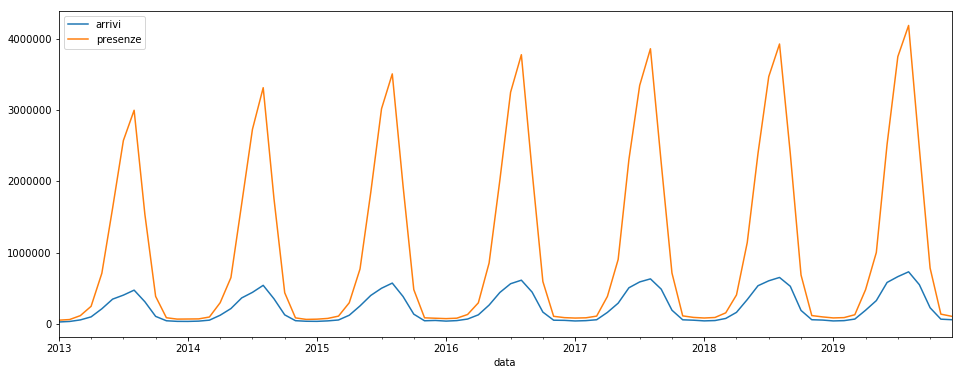

In [6]:
df.plot(figsize=(16, 6))

### Decomposizione della serie temporale in trend, stagionalità e residui

![](https://docs.oracle.com/cd/E40248_01/epm.1112/cb_pred_user/images/graphics/seasonaltypes.gif)<br>

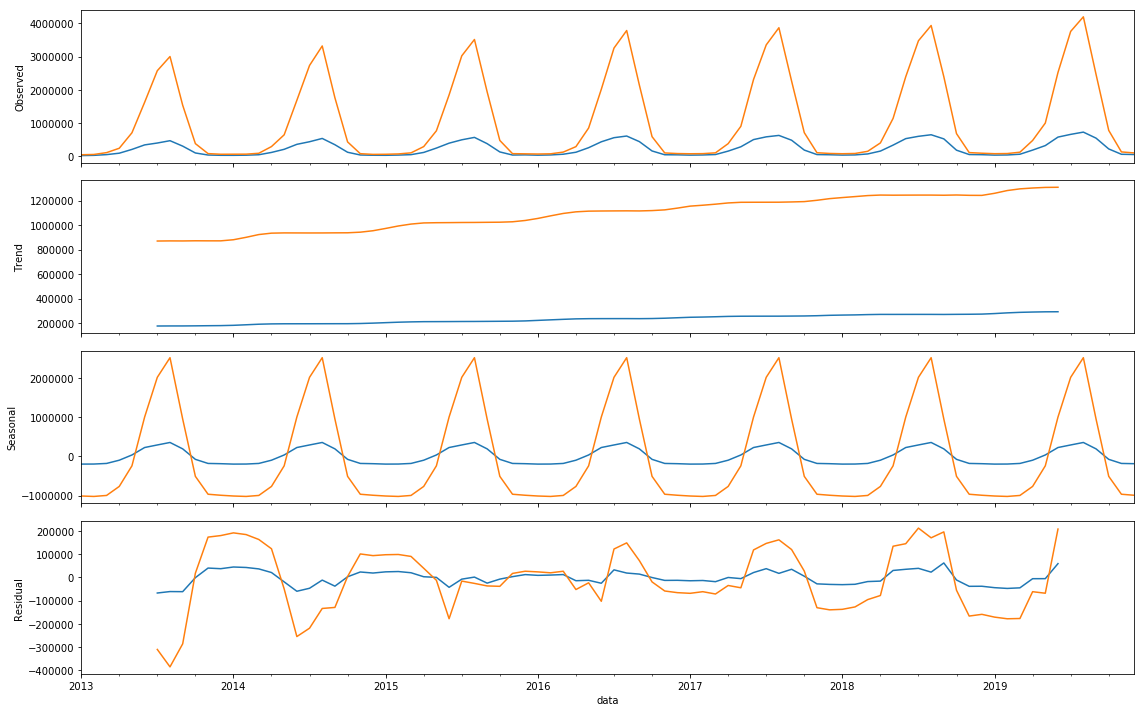

In [7]:
plt.rcParams["figure.figsize"] = (16, 10)
decomposition = seasonal_decompose(df)
decomposition.plot();

### Divisione dati tra set di addestramento e set di test

In [8]:
df_train = df["2013": "2018"]["presenze"]
df_test = df["2019"][["presenze"]]

>### dati di addestramento

In [9]:
df_train = df_train.reset_index()
df_train.columns = ["ds", "y"]
df_train

,ds,y
0,2013-01-01,48088
1,2013-02-01,57182
2,2013-03-01,112057
3,2013-04-01,243437
4,2013-05-01,708573
...,...,...
67,2018-08-01,3932872
68,2018-09-01,2394290
69,2018-10-01,683378
70,2018-11-01,113139


>### dati di test

In [10]:
df_test

,presenze
data,
2019-01-01,79955
2019-02-01,84514
2019-03-01,124794
2019-04-01,477461
2019-05-01,1000629
2019-06-01,2522250
2019-07-01,3755544
2019-08-01,4193556
2019-09-01,2464278


### Creazione modello di previsione

In [11]:
model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


>### Creazione dataframe per le previsioni sul test set

In [12]:
yhat = model.make_future_dataframe(periods=12, freq="MS", include_history=False)
yhat

,ds
0,2019-01-01
1,2019-02-01
2,2019-03-01
3,2019-04-01
4,2019-05-01
5,2019-06-01
6,2019-07-01
7,2019-08-01
8,2019-09-01
9,2019-10-01


>### Previsione sui dati di test

In [13]:
test_predictions = model.predict(yhat)

>### Visualizzazione dataframe previsioni

In [14]:
test_predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,1.298535e+06,1.526226e+05,5.109283e+05,1.298535e+06,1.298535e+06,-9.672855e+05,-9.672855e+05,-9.672855e+05,-9.672855e+05,-9.672855e+05,-9.672855e+05,0.0,0.0,0.0,3.312494e+05
1,2019-02-01,1.305231e+06,1.642873e+05,4.940643e+05,1.305230e+06,1.305231e+06,-9.716965e+05,-9.716965e+05,-9.716965e+05,-9.716965e+05,-9.716965e+05,-9.716965e+05,0.0,0.0,0.0,3.335341e+05
2,2019-03-01,1.311278e+06,2.132392e+05,5.682845e+05,1.311278e+06,1.311279e+06,-9.215595e+05,-9.215595e+05,-9.215595e+05,-9.215595e+05,-9.215595e+05,-9.215595e+05,0.0,0.0,0.0,3.897188e+05
3,2019-04-01,1.317974e+06,4.209981e+05,7.878421e+05,1.317973e+06,1.317975e+06,-7.052588e+05,-7.052588e+05,-7.052588e+05,-7.052588e+05,-7.052588e+05,-7.052588e+05,0.0,0.0,0.0,6.127153e+05
4,2019-05-01,1.324454e+06,9.430282e+05,1.297983e+06,1.324452e+06,1.324455e+06,-2.045581e+05,-2.045581e+05,-2.045581e+05,-2.045581e+05,-2.045581e+05,-2.045581e+05,0.0,0.0,0.0,1.119896e+06
5,2019-06-01,1.331149e+06,2.057923e+06,2.412827e+06,1.331147e+06,1.331152e+06,9.029131e+05,9.029131e+05,9.029131e+05,9.029131e+05,9.029131e+05,9.029131e+05,0.0,0.0,0.0,2.234063e+06
6,2019-07-01,1.337629e+06,3.149100e+06,3.493040e+06,1.337626e+06,1.337632e+06,1.989308e+06,1.989308e+06,1.989308e+06,1.989308e+06,1.989308e+06,1.989308e+06,0.0,0.0,0.0,3.326937e+06
7,2019-08-01,1.344325e+06,3.669364e+06,4.013276e+06,1.344321e+06,1.344329e+06,2.489999e+06,2.489999e+06,2.489999e+06,2.489999e+06,2.489999e+06,2.489999e+06,0.0,0.0,0.0,3.834324e+06
8,2019-09-01,1.351021e+06,2.124938e+06,2.474730e+06,1.351016e+06,1.351025e+06,9.490843e+05,9.490843e+05,9.490843e+05,9.490843e+05,9.490843e+05,9.490843e+05,0.0,0.0,0.0,2.300105e+06
9,2019-10-01,1.357500e+06,6.586637e+05,9.956415e+05,1.357495e+06,1.357505e+06,-5.288174e+05,-5.288174e+05,-5.288174e+05,-5.288174e+05,-5.288174e+05,-5.288174e+05,0.0,0.0,0.0,8.286829e+05


In [15]:
test_predictions.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

>### Visualizzazione previsioni modello

In [16]:
test_predictions["yhat"]

0     3.312494e+05
1     3.335341e+05
2     3.897188e+05
3     6.127153e+05
4     1.119896e+06
5     2.234063e+06
6     3.326937e+06
7     3.834324e+06
8     2.300105e+06
9     8.286829e+05
10    4.015817e+05
11    3.765940e+05
Name: yhat, dtype: float64

>### Aggiunta colonna previsioni a dataset di test

In [17]:
df_test["previsione additivo"] = test_predictions["yhat"].values

>### Visualizzazione grafica dati reali e previsioni prodotte dal modello

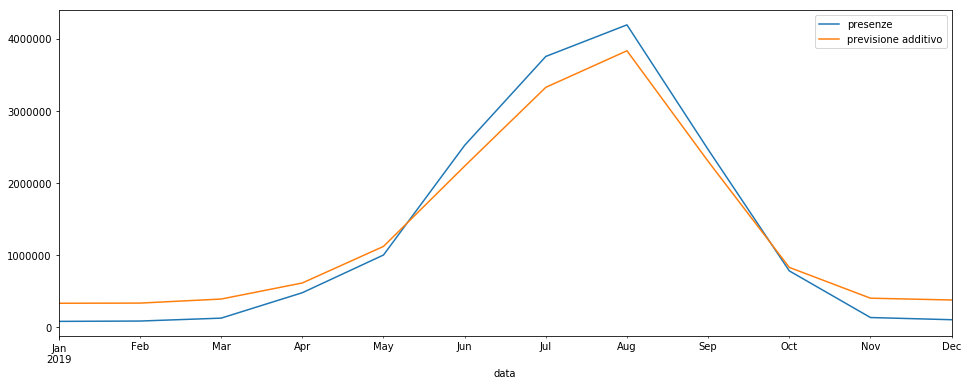

In [18]:
df_test.plot(figsize=(16, 6))

>### Visualizzazione componenti modello fittato

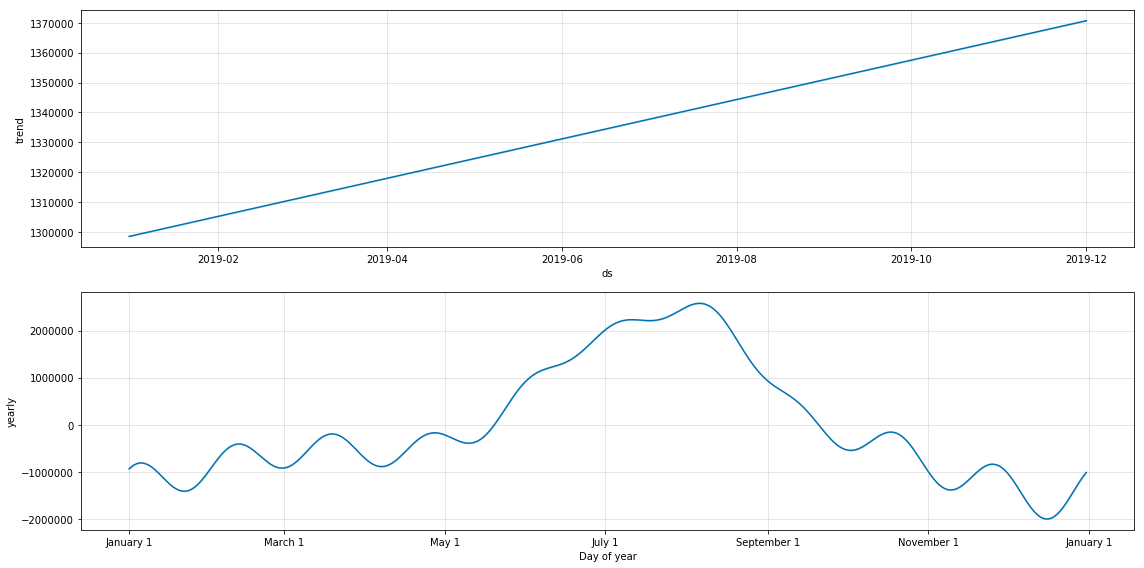

In [19]:
model.plot_components(test_predictions, figsize=(16, 8));

>### Calcolo rmse

In [20]:
df_test["presenze"].mean()

1309971.0

In [21]:
rmse(df_test["presenze"], df_test["previsione additivo"])

258172.38498540284

### Creazione modello di previsione moltiplicativo

>### Previsioni modello

In [22]:
model = Prophet(seasonality_mode="multiplicative")
model.fit(df_train)
yhat = model.make_future_dataframe(periods=12, freq="MS", include_history=False)
test_predictions = model.predict(yhat)
df_test["previsione moltiplicativo"] = test_predictions["yhat"].values
df_test

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,presenze,previsione additivo,previsione moltiplicativo
data,,,
2019-01-01,79955,3.312494e+05,8.378181e+04
2019-02-01,84514,3.335341e+05,8.567117e+04
2019-03-01,124794,3.897188e+05,1.189719e+05
2019-04-01,477461,6.127153e+05,3.836729e+05
2019-05-01,1000629,1.119896e+06,1.003277e+06
2019-06-01,2522250,2.234063e+06,2.341777e+06
2019-07-01,3755544,3.326937e+06,3.636543e+06
2019-08-01,4193556,3.834324e+06,4.229120e+06
2019-09-01,2464278,2.300105e+06,2.401562e+06


>### Visualizzazione risultati

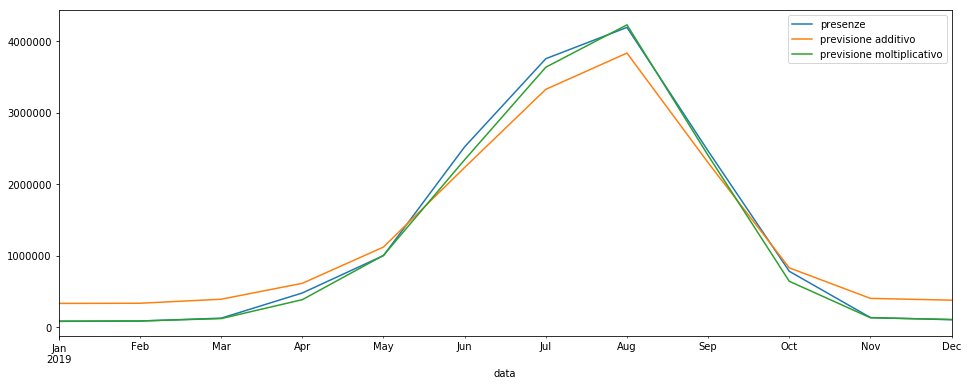

In [23]:
df_test.plot(figsize=(16, 6))

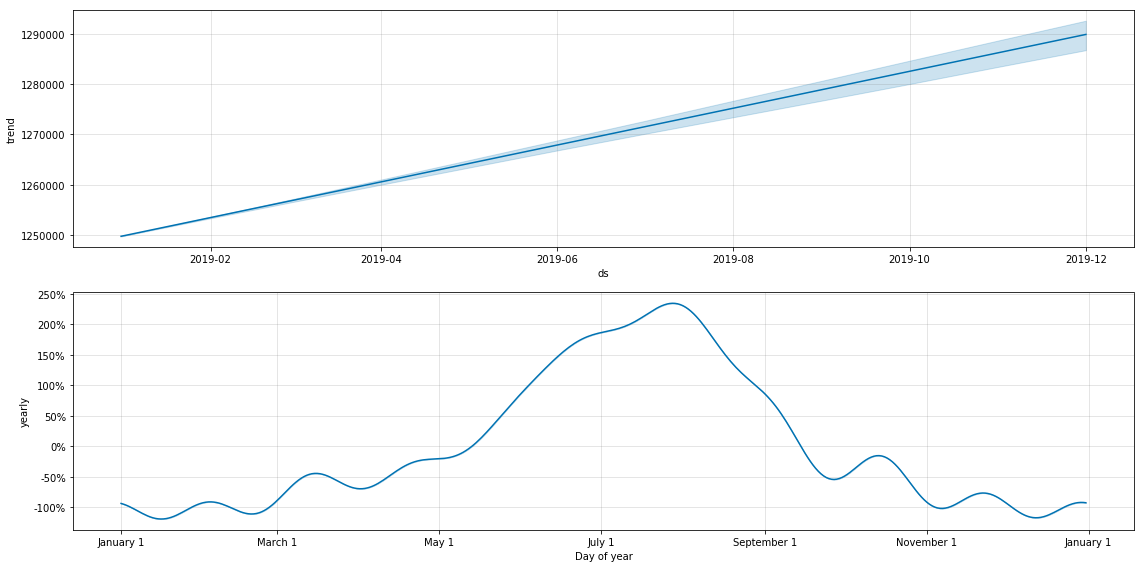

In [24]:
model.plot_components(test_predictions, figsize=(16, 8));

In [25]:
df_test["presenze"].mean()

1309971.0

In [26]:
rmse(df_test["presenze"], df_test["previsione moltiplicativo"])

81807.84783537415

### Prevediamo il "futuro"

>### Preparazione dataset per l'addestramento del modello

In [27]:
df_past = df["presenze"]
df_past = df_past.reset_index()
df_past.columns = ["ds", "y"]
df_past

,ds,y
0,2013-01-01,48088
1,2013-02-01,57182
2,2013-03-01,112057
3,2013-04-01,243437
4,2013-05-01,708573
...,...,...
79,2019-08-01,4193556
80,2019-09-01,2464278
81,2019-10-01,780490
82,2019-11-01,133248


>### Previsione su dati futuri

In [28]:
model = Prophet(seasonality_mode="multiplicative")
model.fit(df_past)
yhat = model.make_future_dataframe(periods=12, freq="MS", include_history=False)
test_predictions = model.predict(yhat)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


>### Unione dati originali e previsioni in un unico dataframe

In [29]:
df_future = test_predictions[["ds", "yhat"]]
df_final = pd.concat([df_past, df_future])

>### Preparazione dataset per rappresentazione grafica risultati

In [30]:
df_final.set_index(df_final["ds"], inplace=True)
df_final = df_final[["y", "yhat"]]

>### Rappresentazione grafica previsione modello

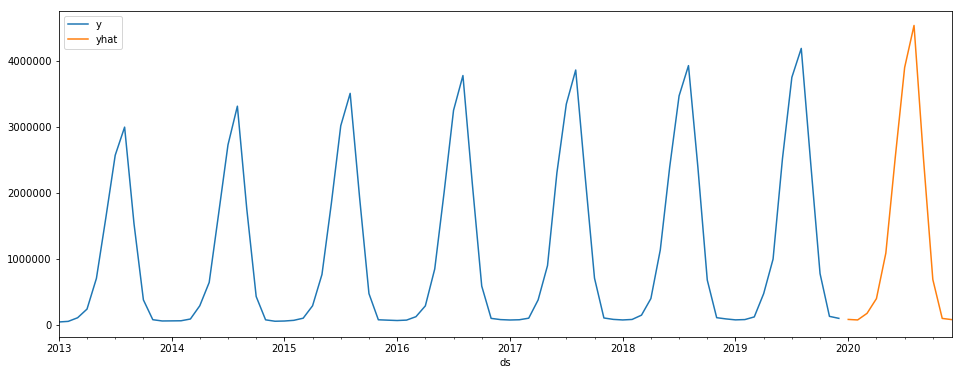

In [31]:
df_final.plot(figsize=(16, 6))